# Illustration of SVMs

In [1]:
# Load Libraries
from sklearn.datasets import make_blobs
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
from sklearn import svm

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('text', usetex=True)
from matplotlib.colors import LinearSegmentedColormap

import numpy as np
from itertools import cycle, islice

# Helper functions to plot the decision regions 

In [2]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# Apply SVM for different values of hyperparameter c

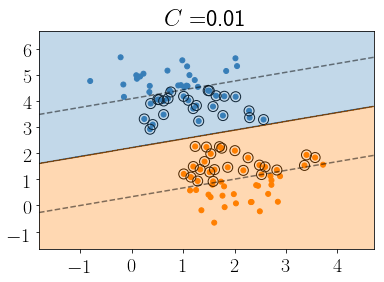

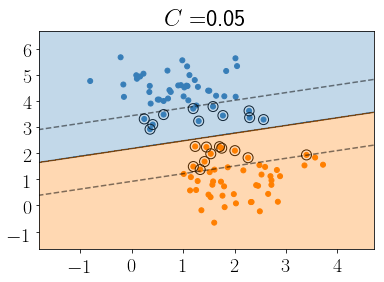

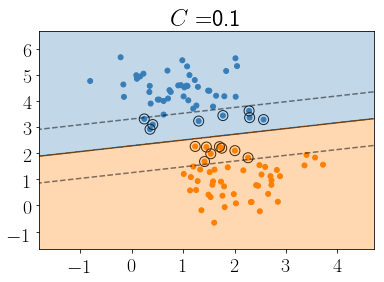

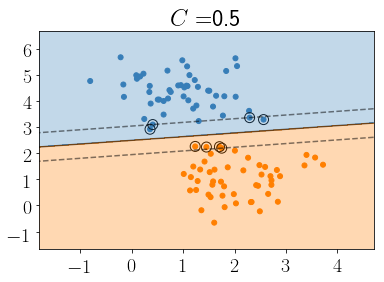

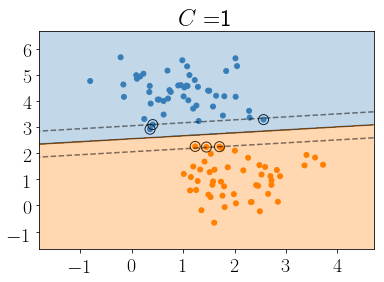

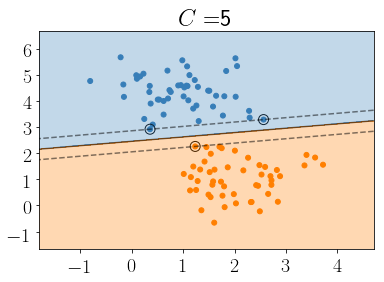

In [3]:
# generate dummy data in 2D feature space
n_classes = 2
X, y = make_blobs(n_samples=100, n_features=2, centers=n_classes, cluster_std=0.7, random_state=0)

# different values for cs
cs = [0.01, 0.05, 0.1, 0.5, 1, 5]

# some colors for plotting
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y) + 1))))
cm = LinearSegmentedColormap.from_list("my_cmap", colors, N=len(colors))

# prepare grid for decision regions
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
xy = np.vstack([xx.ravel(), yy.ravel()]).T

for c in cs:
    clf = svm.SVC(gamma='scale', C=c, kernel='linear')  # define SVM (SVC is for support vector classifier, use linear kernel for illustration)
    clf.fit(X, y)  # train the SVM
    Z = clf.decision_function(xy).reshape(xx.shape)

    # plot the results
    plt.title(r"$C=$" + str(c), size=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # plot points
    plt.scatter(X[:, 0], X[:, 1], s=25, color=colors[y])
    # plot support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    # plot background region
    plot_contours(plt, clf, xx, yy, cmap=cm, alpha=0.3)
    # plot decision boundary and margin
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.show()